In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from bd_datagen import generate_collocation_points
from bd_ffe import FourierFeatureEmbedding
from bd_physicsandloss_fns import pde_loss, bc_loss, interface_loss, flexural_rigidity
from bd_beamnet import BeamNet

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device}")

if device.type == 'cpu':
    torch.set_num_threads(16)
    print(f"Limiting cpu threads to: {torch.get_num_threads()}")

Using cpu
Limiting cpu threads to: 16


In [2]:
# data generation

n_collocation = 500
x_ranges = [(0,2), (2,3)]

x1,x2 = generate_collocation_points(n_collocation, x_ranges)
x1_torch = torch.from_numpy(x1).to(torch.float32).to(device).requires_grad_(True)
x2_torch = torch.from_numpy(x2).to(torch.float32).to(device).requires_grad_(True)

#print(x1_torch, x2_torch)

Epoch 0: Total Loss 3.8060e+06 | PDE 1.0208e+05 | BC 7.5085e+04 | IF 2.9531e+05
Epoch 200: Total Loss 1.0063e+06 | PDE 1.9945e+05 | BC 5.8248e+04 | IF 2.2437e+04
Epoch 400: Total Loss 9.5114e+05 | PDE 1.8421e+05 | BC 5.5234e+04 | IF 2.1459e+04
Epoch 600: Total Loss 8.8248e+05 | PDE 2.2319e+05 | BC 4.7724e+04 | IF 1.8206e+04
Epoch 800: Total Loss 8.5073e+05 | PDE 2.6184e+05 | BC 4.1888e+04 | IF 1.7001e+04
Epoch 1000: Total Loss 8.3377e+05 | PDE 2.7826e+05 | BC 3.9349e+04 | IF 1.6202e+04
Epoch 1200: Total Loss 8.1906e+05 | PDE 2.8511e+05 | BC 3.7761e+04 | IF 1.5633e+04
Epoch 1400: Total Loss 8.1097e+05 | PDE 2.8890e+05 | BC 3.7302e+04 | IF 1.4904e+04
Epoch 1600: Total Loss 8.0496e+05 | PDE 2.9930e+05 | BC 3.6018e+04 | IF 1.4548e+04
Epoch 1800: Total Loss 8.0259e+05 | PDE 2.9689e+05 | BC 3.6584e+04 | IF 1.3986e+04


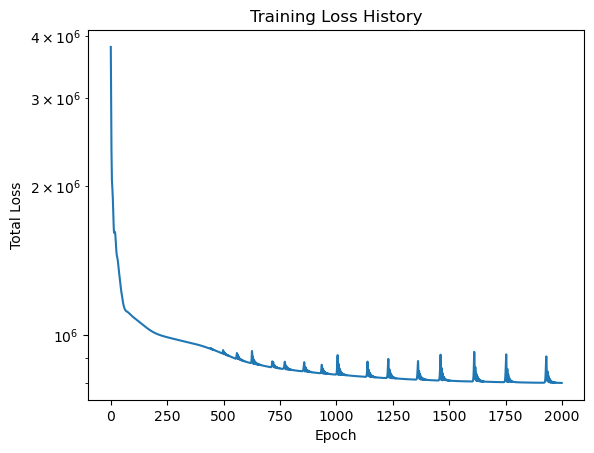

In [3]:
#instantiate the model and plot the losses wrt epochs

model =  BeamNet(n_units=80, n_layers=8,
                 pde_weight=1, bc_weight=10.0, if_weight=10.0,
                 use_ffe=False, num_frequencies=16, fourier_scale=1.0).to(device)

losses = model.fit(x1_torch, x2_torch, epochs=2000, lr=0.0001)



plt.plot(losses)
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Training Loss History')
plt.show()